In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

## Participation

What’s the differenes are between linear reg and NLP, and ANN? what‘s the  advantage and disadvantage?

**Ans:** Linear regression is a statistical method used to find linear relationships between variables, while NLP focuses on analyzing and understanding human language, and ANN is a machine learning model that mimics the human brain to learn complex patterns from data; the key difference lies in the type of data they handle, with linear regression working on numerical data, NLP on text, and ANN being adaptable to various data types depending on the problem at hand.

## Import Data

In [2]:
# This loads our iris data into a numpy array
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
type(iris.data)
iris.data.shape

(150, 4)

In [4]:
iris['feature_names'] + ['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [5]:
# We like working in pandas so we convert and label our columns
irisdf = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Data Exploration

In [6]:
irisdf.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,float64


In [7]:
# Let's describe our data
irisdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


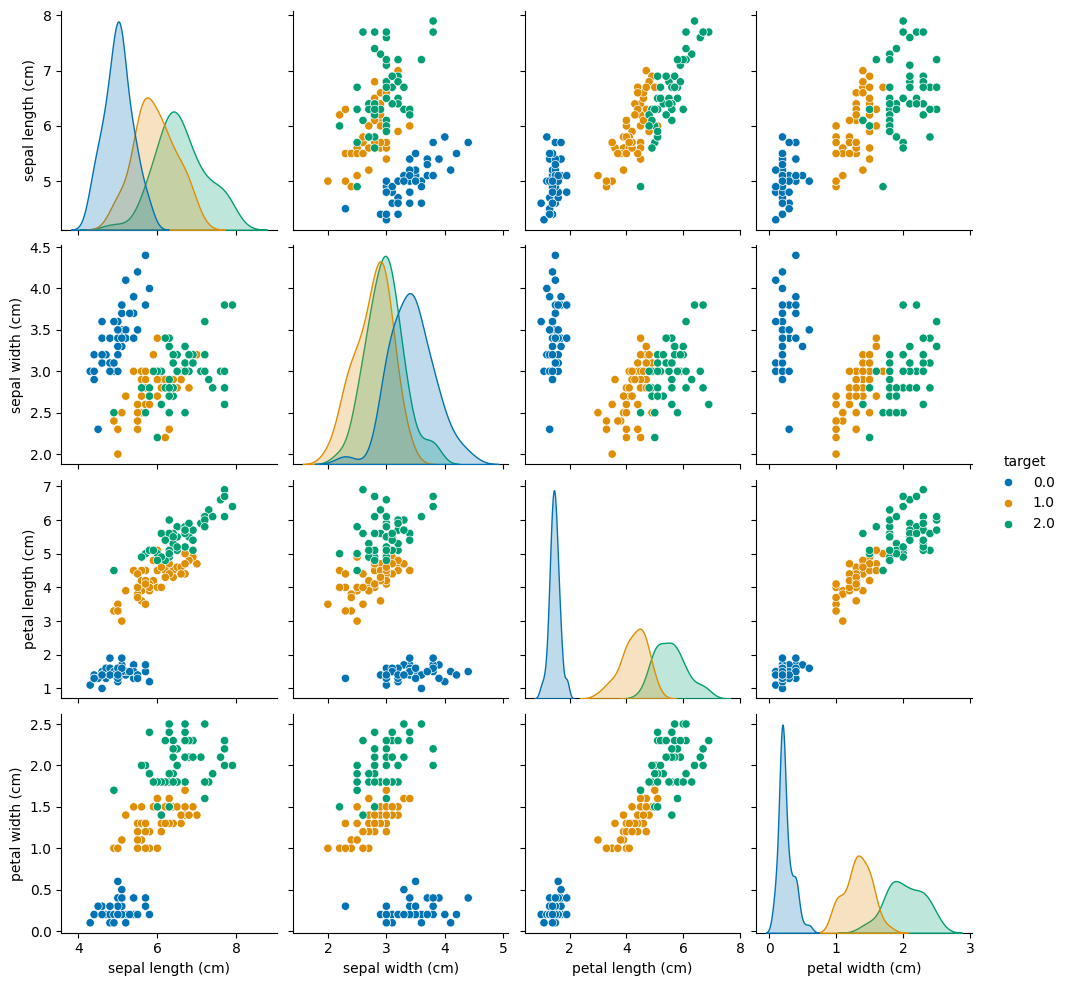

In [8]:
# Let's generate a pairplot and set our target labels as the hue, and use the colorblind colors
sns.pairplot(irisdf, hue='target', palette='colorblind')

In [9]:
irisdf.target.unique()

array([0., 1., 2.])

<Axes: >

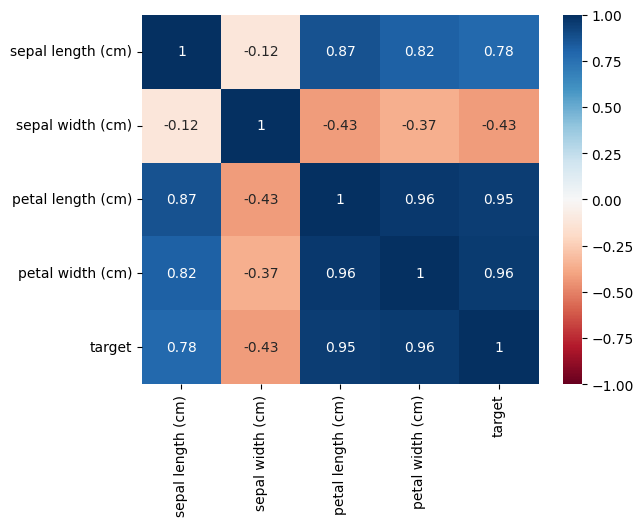

In [10]:
# Let's continue exploring our data by doing a heatmap of our correlation matrix called corr
corr = irisdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

## Data Preprocessing

In [11]:
# Now let's normalize our data and describe it again
# Import our library
from sklearn.preprocessing import MinMaxScaler
# Scale our data using minmax normalization
scaler = MinMaxScaler()
irisnormdf = pd.DataFrame(scaler.fit_transform(irisdf), columns = irisdf.columns)
# Let's now restore our target values
irisnormdf.target = irisnormdf.target * 2
# Now let's display our normalized dataframe
display(irisnormdf)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [12]:
# Let's describe our data once again
irisnormdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46,1.00
std,0.23,0.18,0.30,0.32,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08,0.00
50%,0.42,0.42,0.57,0.50,1.00
75%,0.58,0.54,0.69,0.71,2.00
max,1.00,1.00,1.00,1.00,2.00


In [13]:
irisnormdf.target.unique()

array([0., 1., 2.])

In [14]:
y = irisnormdf.target

# Let's drop our target
irisnormdf = irisnormdf.drop(columns = ['target'])

## More Data Exploration

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

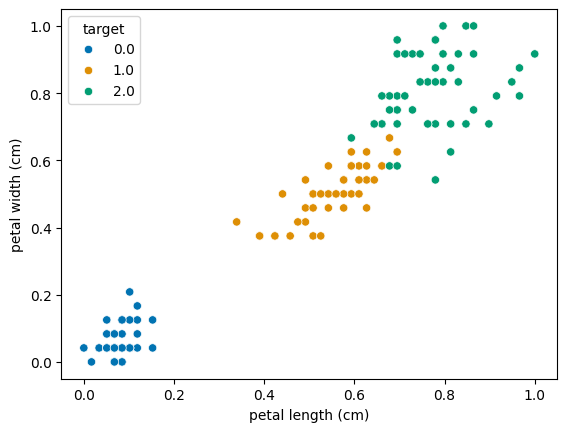

In [15]:
sns.scatterplot(data = irisnormdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y, palette='colorblind')

## Participation Block

## Train our [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(irisnormdf, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
model = Perceptron(random_state=76).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7583333333333333


In [18]:
yhat_test = model.predict(X_test)
display(yhat_test)
accuracy_score(y_test, yhat_test)

array([0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
       0., 0., 0., 2., 1., 0., 0., 1., 2., 0., 2., 2., 2.])

0.7333333333333333

In [19]:
model.coef_

array([[-0.77777778,  1.20833333, -1.61016949, -1.75      ],
       [ 0.5       , -5.04166667,  2.08474576, -3.5       ],
       [-0.16666667, -2.625     ,  4.84745763,  7.04166667]])

In [20]:
model.intercept_

array([ 1.,  1., -7.])

### Import and print [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
#### [Display Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
# Let's create our confusion matrix for train and display it
yhat_train = model.predict(X_train)
myconfusionmatrixtrain = confusion_matrix(y_train, yhat_train, labels=model.classes_)
display(myconfusionmatrixtrain)

array([[37,  0,  0],
       [23, 12,  6],
       [ 0,  0, 42]])

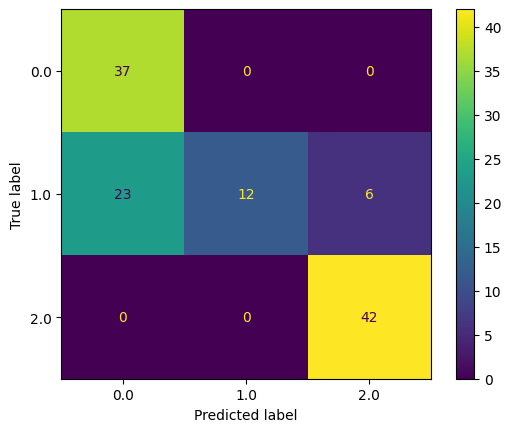

In [23]:
mycmdisptrain = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrixtrain, display_labels=model.classes_)
mycmdisptrain.plot()

In [24]:
# Let's create our confusion matrix for test and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test, labels=model.classes_)
display(myconfusionmatrix)

array([[13,  0,  0],
       [ 7,  2,  0],
       [ 0,  1,  7]])

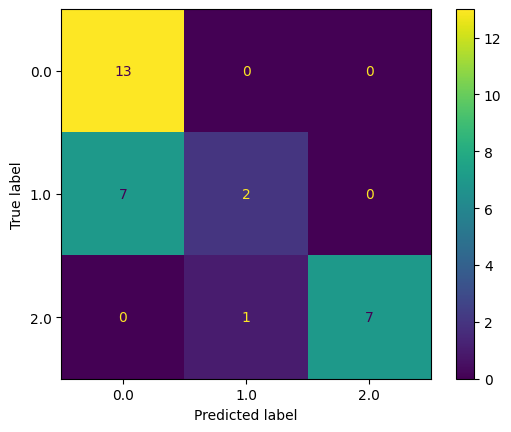

In [25]:
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=model.classes_)
mycmdisp.plot()

#### Print [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#### Watch a [video](https://www.youtube.com/watch?v=jJ7ff7Gcq34) on precision, recall and f1-score

In [26]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        13
         1.0       0.67      0.22      0.33         9
         2.0       1.00      0.88      0.93         8

    accuracy                           0.73        30
   macro avg       0.77      0.70      0.68        30
weighted avg       0.75      0.73      0.69        30



#### Print [Perceptron classification score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.score)

In [27]:
model.score(X_test,y_test)

0.7333333333333333